## Major Questions:

### - Do frequency of earthquakes increase with proximity to injection wells?
### - Can the data be used as a general predictor of proximity or timing of future earthquakes?

### Sub-Bullets

#### - Create a map of earthquakes and well locations
#### - Plot number of wells drilled over time compared to the number of earthquakes over time (in years)
#### - Do the average daily PSI rates have more earthquakes around them?
#### - Do the total BBLs injected have more earthquakes around them?

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import gmaps
import gmaps.datasets
#import geopandas as gpd

# Import API Key
from api_key import g_key

#get csvs
ok_wells = 'resources/InjectionWells.csv'
ok_quakes = 'resources/okQuakes.csv'

#turn csvs into DFs
ok_wells_df = pd.read_csv(ok_wells)
ok_quakes_df = pd.read_csv(ok_quakes)


## EXPLORE DATAFRAMES

In [2]:
ok_quakes_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1973-03-17T07:43:05.500Z,36.087000,-106.168000,6.00,4.50,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:10.078Z,New Mexico,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1,1973-05-25T14:40:13.900Z,33.917000,-90.775000,6.00,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:12.859Z,Mississippi,earthquake,NaN,NaN,NaN,NaN,reviewed,s,us
2,1973-09-19T13:28:20.500Z,37.160000,-104.594000,5.00,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:20.295Z,Colorado,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
3,1973-09-23T03:58:54.900Z,37.148000,-104.571000,5.00,4.20,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:20.346Z,Colorado,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
4,1974-02-15T13:33:49.200Z,36.500000,-100.693000,24.00,4.50,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:22.859Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13941,2016-09-20T05:38:38.350Z,36.373500,-96.818700,4.69,2.30,ml,NaN,54.0,0.01800,0.16,...,2016-09-20T16:13:04.040Z,Oklahoma,earthquake,0.90,1.80,0.059,38.0,reviewed,us,us
13942,2016-09-20T06:36:35.520Z,36.412200,-96.882400,4.41,1.40,ml,NaN,59.0,0.02500,0.18,...,2016-09-20T16:21:03.040Z,Oklahoma,earthquake,0.80,2.00,0.062,34.0,reviewed,us,us
13943,2016-09-20T16:01:08.610Z,37.277167,-98.072667,5.85,2.43,ml,15.0,237.0,0.05185,0.04,...,2016-09-20T19:08:23.720Z,Kansas,earthquake,0.38,0.33,0.179,17.0,reviewed,ismp,ismp
13944,2016-09-20T17:31:48.380Z,36.939300,-97.896000,2.32,3.00,mb_lg,NaN,37.0,0.05600,0.18,...,2016-09-20T17:43:43.040Z,Oklahoma,earthquake,1.00,3.70,0.076,45.0,reviewed,us,us


In [3]:
ok_quakes_df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

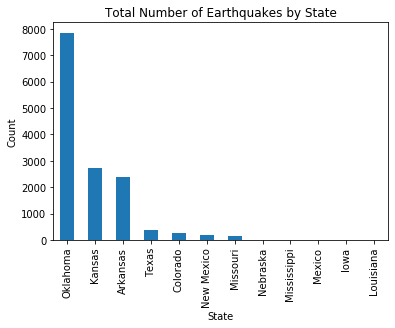

In [4]:
#Determine number of earthquakes by state
earthquake_place_ct = ok_quakes_df['place'].value_counts()

#Plot bar chart to display number of earthquakes by state
state_quakes = earthquake_place_ct.plot.bar(x="State", y="Count",rot=90)
plt.title("Total Number of Earthquakes by State")
plt.xlabel("State")
plt.ylabel("Count")
#save image
plt.savefig("PlotImages/TotalQuakesByState.png",bbox_inches="tight")
state_quakes

In [5]:
ok_wells_df

,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,County,Sec,...,Rng,QQQQ,LAT,LONG,PSI,BBLS,ZONE,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,3.500300e+09,PHOENIX PETROCORP INC,19499.0,2R,SE EUREKA UNIT-TUCKER #1,21,1.338560e+05,9/6/1977,ALFALFA,13,...,10W,C-SE SE,36.900324,-98.218260,"2,500",300,CHEROKEE,NaN,NaN,NaN
1,3.500300e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,CHRISTENSEN,1,4.702580e+05,11/27/2002,ALFALFA,21,...,09W,C-NW NW,36.896636,-98.177720,"2,400","1,000",RED FORK,NaN,NaN,NaN
2,3.500321e+09,LINN OPERATING INC,22182.0,2R,NE CHEROKEE UNIT,85,3.294260e+05,8/19/1988,ALFALFA,24,...,11W,SE NE,36.806113,-98.325840,"1,050","1,000",RED FORK,NaN,NaN,NaN
3,3.500321e+09,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281.0,2R,VELMA,2-19,2.816520e+05,7/11/1985,ALFALFA,19,...,10W,SW NE NE SW,36.888589,-98.318530,"3,152","1,000",RED FORK,NaN,NaN,NaN
4,3.500321e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,GRAY,1A,4.702570e+05,11/27/2002,ALFALFA,20,...,09W,SE SW NW,36.892128,-98.194620,"1,000","2,400",RED FORK,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11121,3.515324e+09,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281.0,2D,JIMMIE SWD,1-28,1.303440e+09,12/7/2012,WOODWARD,28,...,18W,E2 W2 SW SW,36.436857,-99.137391,"2,940","60,000","MUSSELLEM, OKLAHOMA",NaN,NaN,NaN
11122,3.515324e+09,"OVERFLOW ENERGY, LLC",22383.0,CDW,MUTUAL SWD,1,1.608510e+09,10/21/2016,WOODWARD,09,...,18W,N2 NE NE,0.000000,0.000000,"1,625","25,000","DOUGLAS, WOLFCAMP",NaN,NaN,NaN
11123,3.515324e+09,"RED MOUNTAIN OPERATING, LLC",23694.0,2D,HEDGES,1 SWD,1.703870e+09,12/28/2016,WOODWARD,14,...,17W,SW SE SE,0.000000,0.000000,"1,550","15,000","VIRGILIAN, WOLFCAMP,",NaN,NaN,NaN
11124,3.515324e+09,"RED MOUNTAIN OPERATING, LLC",23695.0,2D,GARVIE,1 SWD,1.703600e+09,12/28/2016,WOODWARD,33,...,17W,NW NE NE,0.000000,0.000000,"1,550","15,000","ADMIRE, CHASE, COUNCIL GROVE, DOUGLAS, PONTOTO...",NaN,NaN,NaN


In [6]:
ok_wells_df.columns

Index(['API#', 'Operator', 'Operator ID', 'WellType', 'WellName', 'WellNumber',
       'OrderNumbers', 'Approval Date', 'County', 'Sec', 'Twp', 'Rng', 'QQQQ',
       'LAT', 'LONG', 'PSI', 'BBLS', 'ZONE', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'],
      dtype='object')

## CLEAN UP

### Earthquakes DF

In [7]:
#find all place names
quake_states = ok_quakes_df["place"].unique()
quake_states

array(['New Mexico', 'Mississippi', 'Colorado', 'Oklahoma', 'Arkansas',
       'Missouri', 'Texas', 'Nebraska', 'Kansas', 'Louisiana', 'Iowa',
       'Mexico'], dtype=object)

In [8]:
#isolate quakes to only Oklahoma
ok_quakes_df = ok_quakes_df.loc[ok_quakes_df["place"].str.contains("Oklahoma")]
ok_quakes_df["place"].unique()

array(['Oklahoma'], dtype=object)

In [9]:
len(ok_quakes_df)

7854

In [10]:
#drop any completely null rows
ok_quakes_df = ok_quakes_df.dropna(how="all")
len(ok_quakes_df)

7854

In [11]:
#find individual nulls
quakes_null_columns = ok_quakes_df.columns[ok_quakes_df.isnull().any()]
ok_quakes_df[quakes_null_columns].isnull().sum()

mag                   1
magType               9
nst                7085
gap                 852
dmin               6953
rms                 663
horizontalError    2014
depthError          791
magError           6675
magNst             6572
dtype: int64

In [12]:
#drop large amount of nulls and extraneous data
clean_quakes_df = ok_quakes_df.drop(columns = ["nst", "gap", "dmin","rms", "horizontalError", "depthError", "magError", "magNst"])
clean_quakes_df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'net', 'id',
       'updated', 'place', 'type', 'status', 'locationSource', 'magSource'],
      dtype='object')

In [13]:
#pull out years
clean_quakes_df['time'] = pd.to_datetime(clean_quakes_df['time'])
clean_quakes_df['year'] = clean_quakes_df['time'].dt.year

#move year column next to time

#put columns in list
QuakeCols = clean_quakes_df.columns.tolist()
#move year to approriate column index
QuakeCols.insert(1, 'year')
#remove duplicate year from end of list
QuakeCols.pop()
QuakeCols

['time',
 'year',
 'latitude',
 'longitude',
 'depth',
 'mag',
 'magType',
 'net',
 'id',
 'updated',
 'place',
 'type',
 'status',
 'locationSource',
 'magSource']

In [14]:
#reset df columns
clean_quakes_df = clean_quakes_df[QuakeCols]
clean_quakes_df.head(10)

,time,year,latitude,longitude,depth,mag,magType,net,id,updated,place,type,status,locationSource,magSource
4,1974-02-15 13:33:49.200000+00:00,1974,36.500,-100.693,24.0,4.5,mb,us,usp00005ac,2014-11-06T23:21:22.859Z,Oklahoma,earthquake,reviewed,us,us
21,1974-12-16 02:30:21.400000+00:00,1974,35.330,-97.480,10.0,2.6,ml,us,usp000094v,2014-11-06T23:21:27.851Z,Oklahoma,earthquake,reviewed,m,tul
33,1975-09-13 01:25:02.800000+00:00,1975,34.139,-97.369,5.0,3.4,lg,us,usp0000csk,2014-11-06T23:21:31.918Z,Oklahoma,earthquake,reviewed,us,tul
35,1975-10-12 02:58:11.200000+00:00,1975,34.816,-97.406,20.0,3.2,lg,us,usp0000d4a,2014-11-06T23:21:32.248Z,Oklahoma,earthquake,reviewed,us,tul
36,1975-11-29 14:29:40.900000+00:00,1975,34.521,-97.347,5.0,3.5,lg,us,usp0000dsb,2014-11-06T23:21:32.839Z,Oklahoma,earthquake,reviewed,us,slm
42,1976-03-30 09:27:01+00:00,1976,36.615,-102.083,5.0,2.7,lg,us,usp0000fq3,2014-11-06T23:21:34.688Z,Oklahoma,earthquake,reviewed,us,tul
45,1976-04-16 18:59:44.200000+00:00,1976,36.107,-99.875,5.0,3.4,NaN,us,usp0000fwz,2014-11-06T23:21:34.833Z,Oklahoma,earthquake,reviewed,us,tul
46,1976-04-19 04:42:42.200000+00:00,1976,36.134,-99.841,5.0,3.5,NaN,us,usp0000fya,2014-11-06T23:21:34.862Z,Oklahoma,earthquake,reviewed,us,tul
97,1979-06-07 07:39:35.600000+00:00,1979,35.187,-99.812,5.0,3.0,NaN,us,usp0001150,2014-11-06T23:22:02.344Z,Oklahoma,earthquake,reviewed,d,tul
101,1979-09-13 00:49:19.800000+00:00,1979,35.219,-99.518,5.0,3.4,NaN,us,usp00012xa,2014-11-06T23:22:05.405Z,Oklahoma,earthquake,reviewed,us,tul


In [15]:
# Ensure values for lat/long are within proper range
lat_earthquakes = clean_quakes_df['latitude']
long_earthquakes = clean_quakes_df['longitude']
proper_coord_earthquakes = clean_quakes_df.loc[(lat_earthquakes<=90)&
                                                 (lat_earthquakes>=-90)&
                                                 (long_earthquakes<=180)&
                                                 (long_earthquakes>=-180)]
len(proper_coord_earthquakes)

7854

In [16]:
len(clean_quakes_df)

7854

### Injection Wells DF

In [17]:
len(ok_wells_df)

11126

In [18]:
#drop any completely null rows
ok_wells_df= ok_wells_df.dropna(how="all")
len(ok_wells_df)

11125

In [19]:
#find individual nulls
wells_null_columns = ok_wells_df.columns[ok_wells_df.isnull().any()]
ok_wells_df[wells_null_columns].isnull().sum()

WellName            1
WellNumber          1
OrderNumbers        1
PSI              1436
BBLS             1436
Unnamed: 18     11125
Unnamed: 19     11125
Unnamed: 20     11125
dtype: int64

In [20]:
#drop large amount of nulls and extraneous data
ok_wells_df = ok_wells_df.drop(columns = ["QQQQ", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20"])
wells_null_columns = ok_wells_df.columns[ok_wells_df.isnull().any()]
ok_wells_df[wells_null_columns].isnull().sum()

WellName           1
WellNumber         1
OrderNumbers       1
PSI             1436
BBLS            1436
dtype: int64

In [21]:
#drop other nulls
clean_wells_df = ok_wells_df.dropna()
len(clean_wells_df)

9685

In [22]:
#pull out years
clean_wells_df['Approval Date'] = pd.to_datetime(clean_wells_df['Approval Date'])
clean_wells_df['year'] = clean_wells_df['Approval Date'].dt.year

#move year column next to time

#put columns in list
WellsCols = clean_wells_df.columns.tolist()
#move year to 8th index
WellsCols.insert(8, 'year')
#remove duplicate year from end of list
WellsCols.pop()
WellsCols

C:\Users\puppy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\puppy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['API#',
 'Operator',
 'Operator ID',
 'WellType',
 'WellName',
 'WellNumber',
 'OrderNumbers',
 'Approval Date',
 'year',
 'County',
 'Sec',
 'Twp',
 'Rng',
 'LAT',
 'LONG',
 'PSI',
 'BBLS',
 'ZONE']

In [23]:
#reset df columns
clean_wells_df = clean_wells_df[WellsCols]
clean_wells_df.head(10)

,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,year,County,Sec,Twp,Rng,LAT,LONG,PSI,BBLS,ZONE
0,3.500300e+09,PHOENIX PETROCORP INC,19499.0,2R,SE EUREKA UNIT-TUCKER #1,21,1.338560e+05,1977-09-06,1977,ALFALFA,13,28N,10W,36.900324,-98.21826,"2,500",300,CHEROKEE
1,3.500300e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,CHRISTENSEN,1,4.702580e+05,2002-11-27,2002,ALFALFA,21,28N,09W,36.896636,-98.17772,"2,400","1,000",RED FORK
2,3.500321e+09,LINN OPERATING INC,22182.0,2R,NE CHEROKEE UNIT,85,3.294260e+05,1988-08-19,1988,ALFALFA,24,27N,11W,36.806113,-98.32584,"1,050","1,000",RED FORK
3,3.500321e+09,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281.0,2R,VELMA,2-19,2.816520e+05,1985-07-11,1985,ALFALFA,19,28N,10W,36.888589,-98.31853,"3,152","1,000",RED FORK
4,3.500321e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,GRAY,1A,4.702570e+05,2002-11-27,2002,ALFALFA,20,28N,09W,36.892128,-98.19462,"1,000","2,400",RED FORK
5,3.500321e+09,PARADIGM PETROLEUM CORPORATION,22867.0,2R,NORTH CARMEN RED FORK UNIT,8,4.053050e+05,1996-09-17,1996,ALFALFA,3,24N,12W,36.591824,-98.46356,750,"2,000",RED FORK
6,3.500321e+09,PRIDE ENERGY COMPANY,19430.0,2D,LESLIE,A-1,1.006450e+09,2010-05-06,2010,ALFALFA,5,25N,12W,36.674104,-98.51565,"1,280","2,000",PERMIAN
7,3.500321e+09,ZEIDERS BROS OIL & GAS CO LLC,22680.0,2D,USF&G FELLERS,1A-36,3.481570e+05,1990-06-25,1990,ALFALFA,36,28N,11W,36.857775,-98.32979,0,"1,000",MISSISSIPPI
8,3.500321e+09,MARJO OPERATING MID-CONTINENT LLC,23610.0,2R,BURCHFIEL,15-3,4.336930e+05,1999-07-14,1999,ALFALFA,15,27N,09W,36.819572,-98.14953,"1,500","1,800",MISENER
9,3.500321e+09,PARADIGM PETROLEUM CORPORATION,22867.0,2R,NORTH CARMEN RED FORK UNIT,1,4.234560e+05,1998-05-27,1998,ALFALFA,34,25N,12W,36.596660,-98.48296,"3,500",750,RED FORK (CHEROKEE)


In [24]:
#Ensure values for lat/long are within proper range
lat_wells = clean_wells_df['LAT']
long_wells = clean_wells_df['LONG']

proper_coord_wells = clean_wells_df.loc[(lat_wells<=90)&
                                     (lat_wells>=-90)&
                                     (long_wells<=180)&
                                     (long_wells>=-180)]
len(proper_coord_wells)

9679

In [25]:
len(clean_wells_df)

9685

In [26]:
clean_wells_df = proper_coord_wells
len(clean_wells_df)

9679

In [27]:
clean_wells_df["year"].min()

1936

In [28]:
clean_quakes_df["year"].min()

1974

In [29]:
clean_wells_df = clean_wells_df.loc[clean_wells_df["year"] >= 1974]
len(clean_wells_df)

8723

In [30]:
clean_quakes_df["year"].max()

2016

In [31]:
clean_wells_df["year"].max()

2017

In [32]:
clean_wells_df = clean_wells_df.loc[clean_wells_df["year"] <= 2016]
len(clean_wells_df)

8529

In [33]:
#check datatypes for plotting
clean_wells_df.dtypes

API#                    float64
Operator                 object
Operator ID             float64
WellType                 object
WellName                 object
WellNumber               object
OrderNumbers            float64
Approval Date    datetime64[ns]
year                      int64
County                   object
Sec                      object
Twp                      object
Rng                      object
LAT                     float64
LONG                    float64
PSI                      object
BBLS                     object
ZONE                     object
dtype: object

In [34]:
#get rid of commas in strings
clean_wells_df["PSI"] = clean_wells_df["PSI"].str.replace(',', '')
clean_wells_df["BBLS"] = clean_wells_df["BBLS"].str.replace(',', '')
clean_wells_df["PSI"].unique()

array(['2500', '2400', '1050', '3152', '1000', '750', '1280', '0', '1500',
       '3500', '500', '1250', '2000', '3000', '2800', '2264', '2320',
       '2375', '2250', '2450', '5915', '700', '1450', '1200', '1400',
       '300', '50', '914', '1350', '1600', '902', '100', '1700', '325',
       '250', '850', '800', '200', '1900', '1800', '2150', '2300', '1912',
       '1688', '2100', '1785', '2475', '1300', '900', '435', '2200',
       '1675', '4900', '4500', '3600', '1140', '5500', '5000', '4000',
       '801', '980', '1100', '982', '1850', '650', '1026', '950', '1076',
       '1008', '600', '1014', '1816', '1740', '1750', '825', '2342',
       '2570', '400', '1115', '1087', '1235', '1290', '1305', '1210',
       '1862', '3150', '2245', '1650', '886', '722', '1145', '1340',
       '796', '1080', '1109', '1195', '1085', '1550', '443', '2750',
       '2280', '2947', '2517', '550', '1075', '1135', '2504', '1775',
       '545', '1150', '450', '150', '2850', '2700', '1375', '540', '2765',
  

In [35]:
clean_wells_df["BBLS"].unique()

array(['300', '1000', '2400', '2000', '1800', '750', '1200', '4500',
       '1500', '20000', '2500', '3000', '100', '50000', '19900', '60000',
       '19500', '100000', '80000', '15000', '65000', '45000', '25000',
       '40000', '14000', '10000', '500', '19990', '6000', '14400', '690',
       '200', '8400', '1300', '2200', '3200', '12000', '5000', '80',
       '1400', '2100', '50', '7000', '30', '40', '4000', '900', '8000',
       '4900', '400', '4999', '35000', '600', '650', '800', '7200',
       '30000', '7500', '13000', '4600', '2700', '0', '3600', '1700',
       '20', '150', '350', '2600', '550', '250', '3500', '1150', '2550',
       '1900', '1350', '850', '1100', '130', '325', '327', '675', '995',
       '680', '1600', '700', '2800', '26800', '420', '950', '75', '375',
       '1170', '1380', '1650', '5200', '2850', '1445', '1560', '1550',
       '2250', '1080', '980', '5800', '784', '70', '120', '22000', '610',
       '3670', '1750', '1075', '2900', '4800', '4200', '450', '972',


In [36]:
#drop bad data
clean_wells_df = clean_wells_df[~clean_wells_df.PSI.str.contains("/")]
clean_wells_df = clean_wells_df[~clean_wells_df.PSI.str.contains("V")]
clean_wells_df = clean_wells_df[~clean_wells_df.BBLS.str.contains("/")]
clean_wells_df = clean_wells_df[~clean_wells_df.BBLS.str.contains("V")]
clean_wells_df["PSI"].unique()

array(['2500', '2400', '1050', '3152', '1000', '750', '1280', '0', '1500',
       '3500', '500', '1250', '2000', '3000', '2800', '2264', '2320',
       '2375', '2250', '2450', '5915', '700', '1450', '1200', '1400',
       '300', '50', '914', '1350', '1600', '902', '100', '1700', '325',
       '250', '850', '800', '200', '1900', '1800', '2150', '2300', '1912',
       '1688', '2100', '1785', '2475', '1300', '900', '435', '2200',
       '1675', '4900', '4500', '3600', '1140', '5500', '5000', '4000',
       '801', '980', '1100', '982', '1850', '650', '1026', '950', '1076',
       '1008', '600', '1014', '1816', '1740', '1750', '825', '2342',
       '2570', '400', '1115', '1087', '1235', '1290', '1305', '1210',
       '1862', '3150', '2245', '1650', '886', '722', '1145', '1340',
       '796', '1080', '1109', '1195', '1085', '1550', '443', '2750',
       '2280', '2947', '2517', '550', '1075', '1135', '2504', '1775',
       '545', '1150', '450', '150', '2850', '2700', '1375', '540', '2765',
  

In [37]:
clean_wells_df["BBLS"].unique()

array(['300', '1000', '2400', '2000', '1800', '750', '1200', '4500',
       '1500', '20000', '2500', '3000', '100', '50000', '19900', '60000',
       '19500', '100000', '80000', '15000', '65000', '45000', '25000',
       '40000', '14000', '10000', '500', '19990', '6000', '14400', '690',
       '200', '8400', '1300', '2200', '3200', '12000', '5000', '80',
       '1400', '2100', '50', '7000', '30', '40', '4000', '900', '8000',
       '4900', '400', '4999', '35000', '600', '650', '800', '7200',
       '30000', '7500', '13000', '4600', '2700', '0', '3600', '1700',
       '20', '150', '350', '2600', '550', '250', '3500', '1150', '2550',
       '1900', '1350', '850', '1100', '130', '325', '327', '675', '995',
       '680', '1600', '700', '2800', '26800', '420', '950', '75', '375',
       '1170', '1380', '1650', '5200', '2850', '1445', '1560', '1550',
       '2250', '1080', '980', '5800', '784', '70', '120', '22000', '610',
       '3670', '1750', '1075', '2900', '4800', '4200', '450', '972',


In [38]:
#convert to int
clean_wells_df[["PSI", "BBLS"]] = clean_wells_df[["PSI", "BBLS"]].astype(int)
#confirm type
clean_wells_df.dtypes

API#                    float64
Operator                 object
Operator ID             float64
WellType                 object
WellName                 object
WellNumber               object
OrderNumbers            float64
Approval Date    datetime64[ns]
year                      int64
County                   object
Sec                      object
Twp                      object
Rng                      object
LAT                     float64
LONG                    float64
PSI                       int32
BBLS                      int32
ZONE                     object
dtype: object

## EXPLORATORY PLOTS

### Create a Map of Earthquakes and Well locations

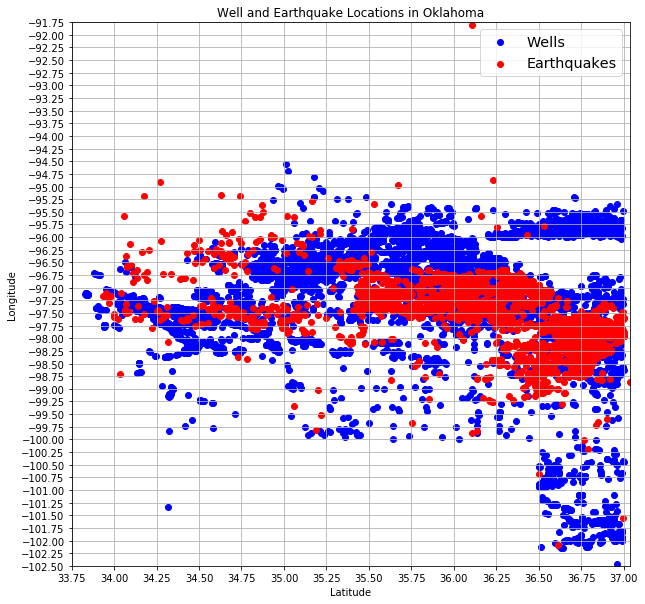

In [39]:
#plot lat/longs of earthquakes
quakes_x = clean_quakes_df["latitude"]
quakes_y = clean_quakes_df["longitude"]

#plot lat/longs of wells
wells_x = clean_wells_df["LAT"]
wells_y = clean_wells_df["LONG"]

#build plot
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(wells_x, wells_y, c='b', label='Wells')
ax.scatter(quakes_x, quakes_y, c='r', label='Earthquakes')
leg = ax.legend(fontsize="x-large");


#set lims to min and max of longer DF
plt.xlim(min(quakes_x),max(quakes_x))
plt.ylim(min(quakes_y),max(quakes_y))

#set more specific ticks for readability
yticks = np.arange((-102.5),(-91.5), .25)
xticks = np.arange(33.75, 37.25, .25)
plt.yticks(yticks)
plt.xticks(xticks)

#display plot with grid lines & labels
plt.grid()
plt.title("Well and Earthquake Locations in Oklahoma")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.savefig("PlotImages/WellQuakesLocationScatter.png",bbox_inches="tight")

### Plot Number of Wells Drilled Over Time and Number of Earthquakes Over Time (in years)

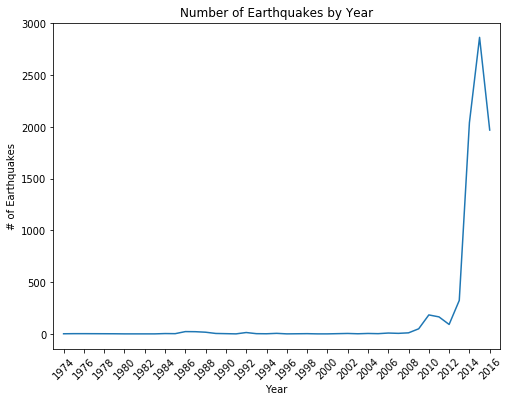

In [40]:
#get a count of quakes by year
yearly_quakes = pd.DataFrame(clean_quakes_df.groupby(["year"]).count())

#set year ticks
xticks = np.arange(1974, 2018, 2)
xlim = (1973, 2017)

YearlyQuakesPlot = yearly_quakes["time"].plot.line(title = "Number of Earthquakes by Year", rot = 45, figsize = (8,6))
YearlyQuakesPlot.set_xlabel("Year")
YearlyQuakesPlot.set_xlim(xlim)
YearlyQuakesPlot.set_xticks(xticks)
YearlyQuakesPlot.set_ylabel("# of Earthquakes")
#save image
fig = YearlyQuakesPlot.get_figure()
fig.savefig('PlotImages/QuakesbyYear.PNG')


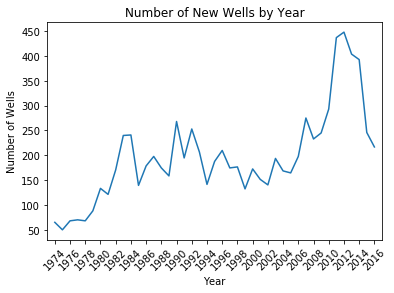

<Figure size 720x432 with 0 Axes>

In [41]:
#get a count of wells per year
WellsGroupbyYear = clean_wells_df.groupby(["year"])
WellCounts = WellsGroupbyYear["WellName"].count()

plt.plot(WellCounts)
plt.title("Number of New Wells by Year")
plt.xlabel("Year")
plt.xticks(xticks, rotation = 45)
plt.xlim(xlim)
plt.ylabel("Number of Wells")
plt.figure(figsize=(10,6))
#save image
plt.savefig("PlotImages/NewWellsbyYear.png",bbox_inches="tight")
#display
plt.show()

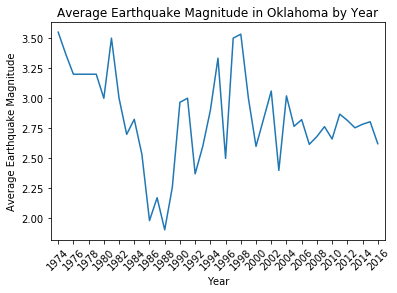

<Figure size 720x432 with 0 Axes>

In [42]:
#Determine average magnitude of earthquake for each year in Oklahoma
earthquake_mag_year_df = clean_quakes_df.groupby(["year"])["mag"].mean()

#Determine unique year values for earthquakes occurring in Oklahoma 
earthquake_mag_year_val_df = clean_quakes_df['year'].unique()

#Define x and y values for line graph
x_axis = earthquake_mag_year_val_df
y_axis = earthquake_mag_year_df

#Create line graph
plt.plot(x_axis, y_axis)
plt.title("Average Earthquake Magnitude in Oklahoma by Year")
plt.xlabel("Year")
plt.xticks(xticks, rotation = 45)
plt.xlim(xlim)
plt.ylabel("Average Earthquake Magnitude")
plt.figure(figsize=(10,6))
#save image
plt.savefig("PlotImages/AvgQuakeMagbyYear.png",bbox_inches="tight")

### Do the Average Daily PSI Rates Have More Earthquakes Around Them?

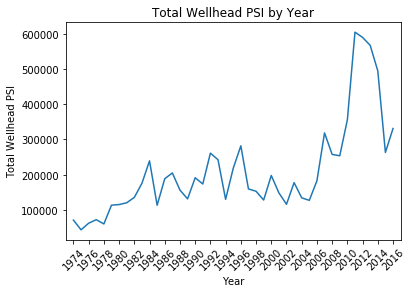

<Figure size 720x432 with 0 Axes>

In [43]:
#get PSI totals by year
YearlyPsiTotal = WellsGroupbyYear["PSI"].sum()
#plot
plt.plot(YearlyPsiTotal)
plt.title("Total Wellhead PSI by Year")
plt.xlabel("Year")
plt.xticks(xticks, rotation = 45)
plt.xlim(1973,2017)
plt.ylabel("Total Wellhead PSI")
plt.figure(figsize=(10,6))
#save image
plt.savefig("PlotImages/PSITotalbyYear.png",bbox_inches="tight")

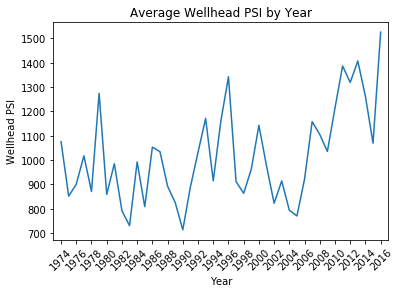

<Figure size 720x432 with 0 Axes>

In [44]:
#get average PSI
YearlyPsiAvg = WellsGroupbyYear["PSI"].mean()
#plot
plt.plot(YearlyPsiAvg)
plt.title("Average Wellhead PSI by Year")
plt.xlabel("Year")
plt.xticks(xticks, rotation = 45)
plt.xlim(xlim)
plt.ylabel("Wellhead PSI")
plt.figure(figsize=(10,6))
#save image
plt.savefig("PlotImages/PSIAveragebyYear.png",bbox_inches="tight")

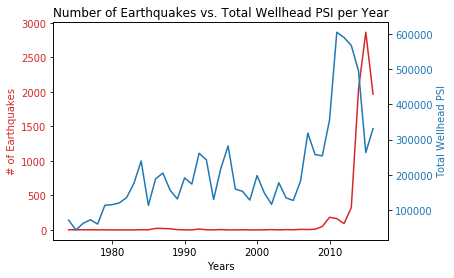

In [45]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('# of Earthquakes', color=color)
ax1.plot(yearly_quakes["time"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total Wellhead PSI', color=color)  # we already handled the x-label with ax1
ax2.plot(YearlyPsiTotal, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Number of Earthquakes vs. Total Wellhead PSI per Year")
#save image
plt.savefig("PlotImages/QuakesVsTotalPSI.png",bbox_inches="tight")


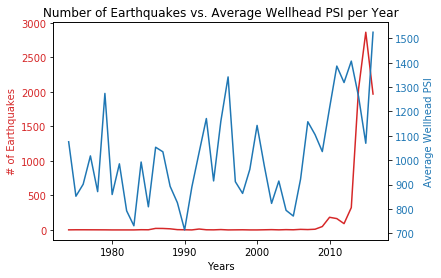

In [46]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('# of Earthquakes', color=color)
ax1.plot(yearly_quakes["time"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Wellhead PSI', color=color)  # we already handled the x-label with ax1
ax2.plot(YearlyPsiAvg, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Number of Earthquakes vs. Average Wellhead PSI per Year")
#save image
plt.savefig("PlotImages/QuakesVsAveragePSI.png",bbox_inches="tight")

### Do the Total BBLs Injected Have More Earthquakes Around Them?

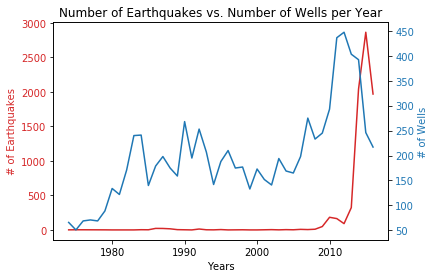

In [47]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('# of Earthquakes', color=color)
ax1.plot(yearly_quakes["time"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of Wells', color=color)  # we already handled the x-label with ax1
ax2.plot(WellCounts, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Number of Earthquakes vs. Number of Wells per Year")
#save image
plt.savefig("PlotImages/TotalWellsVsTotalQuakes.png",bbox_inches="tight")

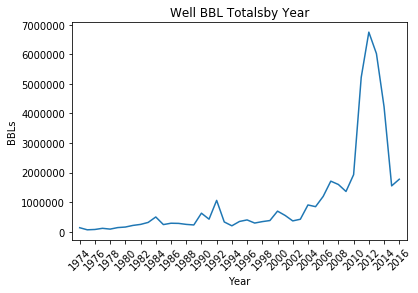

<Figure size 720x432 with 0 Axes>

In [48]:
#get BBLS totals by year
YearlyBBLTotal = WellsGroupbyYear["BBLS"].sum()
#plot
plt.plot(YearlyBBLTotal)
plt.title("Well BBL Totalsby Year")
plt.xlabel("Year")
plt.xticks(xticks, rotation = 45)
plt.xlim(xlim)
plt.ylabel("BBLs")
plt.figure(figsize=(10,6))
#save image
plt.savefig("PlotImages/TotalBBLsperYear.png",bbox_inches="tight")

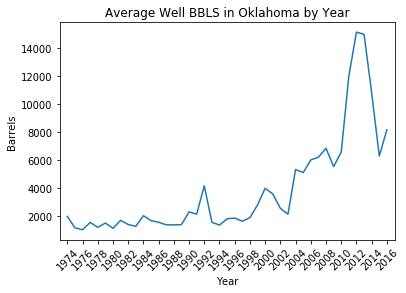

<Figure size 720x432 with 0 Axes>

In [49]:
YearlyBBLAvg = WellsGroupbyYear["BBLS"].mean()
plt.plot(YearlyBBLAvg)
plt.title("Average Well BBLS in Oklahoma by Year")
plt.xlabel("Year")
plt.xticks(xticks, rotation = 45)
plt.xlim(xlim)
plt.ylabel("Barrels")
plt.figure(figsize=(10,6))
#save image
plt.savefig("PlotImages/AverageBBLsbyYear.png",bbox_inches="tight")

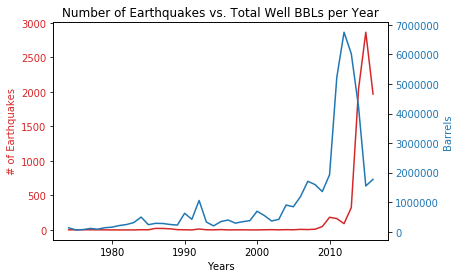

In [50]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('# of Earthquakes', color=color)
ax1.plot(yearly_quakes["time"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Barrels', color=color)  # we already handled the x-label with ax1
ax2.plot(YearlyBBLTotal, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Number of Earthquakes vs. Total Well BBLs per Year")
#save image
plt.savefig("PlotImages/QuakesVsTotalBBLs.png",bbox_inches="tight")

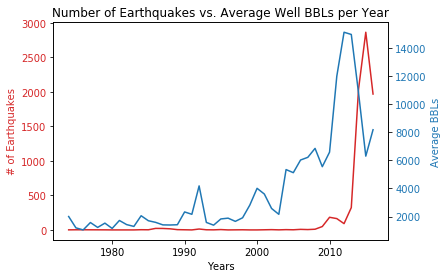

In [51]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('# of Earthquakes', color=color)
ax1.plot(yearly_quakes["time"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average BBLs', color=color)  # we already handled the x-label with ax1
ax2.plot(YearlyBBLAvg, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Number of Earthquakes vs. Average Well BBLs per Year")
#save image
plt.savefig("PlotImages/QuakesVsAverageBBLs.png",bbox_inches="tight")

### Create a Map of Earthquakes and Well locations

In [52]:
# Create bins to put years for earthquakes 
bins = [1970, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
group_labels = ['1970 to 2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

In [53]:
bin_clean_quakes_df = clean_quakes_df

In [54]:
bin_clean_quakes_df

,time,year,latitude,longitude,depth,mag,magType,net,id,updated,place,type,status,locationSource,magSource
4,1974-02-15 13:33:49.200000+00:00,1974,36.5000,-100.6930,24.00,4.5,mb,us,usp00005ac,2014-11-06T23:21:22.859Z,Oklahoma,earthquake,reviewed,us,us
21,1974-12-16 02:30:21.400000+00:00,1974,35.3300,-97.4800,10.00,2.6,ml,us,usp000094v,2014-11-06T23:21:27.851Z,Oklahoma,earthquake,reviewed,m,tul
33,1975-09-13 01:25:02.800000+00:00,1975,34.1390,-97.3690,5.00,3.4,lg,us,usp0000csk,2014-11-06T23:21:31.918Z,Oklahoma,earthquake,reviewed,us,tul
35,1975-10-12 02:58:11.200000+00:00,1975,34.8160,-97.4060,20.00,3.2,lg,us,usp0000d4a,2014-11-06T23:21:32.248Z,Oklahoma,earthquake,reviewed,us,tul
36,1975-11-29 14:29:40.900000+00:00,1975,34.5210,-97.3470,5.00,3.5,lg,us,usp0000dsb,2014-11-06T23:21:32.839Z,Oklahoma,earthquake,reviewed,us,slm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13940,2016-09-20 04:59:11.140000+00:00,2016,36.9246,-97.8946,2.62,3.9,mwr,us,us10006qzl,2016-09-20T19:15:48.944Z,Oklahoma,earthquake,reviewed,us,us
13941,2016-09-20 05:38:38.350000+00:00,2016,36.3735,-96.8187,4.69,2.3,ml,us,us10006qzw,2016-09-20T16:13:04.040Z,Oklahoma,earthquake,reviewed,us,us
13942,2016-09-20 06:36:35.520000+00:00,2016,36.4122,-96.8824,4.41,1.4,ml,us,us10006r04,2016-09-20T16:21:03.040Z,Oklahoma,earthquake,reviewed,us,us
13944,2016-09-20 17:31:48.380000+00:00,2016,36.9393,-97.8960,2.32,3.0,mb_lg,us,us10006r59,2016-09-20T17:43:43.040Z,Oklahoma,earthquake,reviewed,us,us


In [55]:
# place data series into new column inside dataframe
bin_clean_quakes_df['year'] = pd.cut(bin_clean_quakes_df['year'], bins, labels=group_labels)
bin_clean_quakes_df.head()

,time,year,latitude,longitude,depth,mag,magType,net,id,updated,place,type,status,locationSource,magSource
4,1974-02-15 13:33:49.200000+00:00,1970 to 2009,36.500,-100.693,24.0,4.5,mb,us,usp00005ac,2014-11-06T23:21:22.859Z,Oklahoma,earthquake,reviewed,us,us
21,1974-12-16 02:30:21.400000+00:00,1970 to 2009,35.330,-97.480,10.0,2.6,ml,us,usp000094v,2014-11-06T23:21:27.851Z,Oklahoma,earthquake,reviewed,m,tul
33,1975-09-13 01:25:02.800000+00:00,1970 to 2009,34.139,-97.369,5.0,3.4,lg,us,usp0000csk,2014-11-06T23:21:31.918Z,Oklahoma,earthquake,reviewed,us,tul
35,1975-10-12 02:58:11.200000+00:00,1970 to 2009,34.816,-97.406,20.0,3.2,lg,us,usp0000d4a,2014-11-06T23:21:32.248Z,Oklahoma,earthquake,reviewed,us,tul
36,1975-11-29 14:29:40.900000+00:00,1970 to 2009,34.521,-97.347,5.0,3.5,lg,us,usp0000dsb,2014-11-06T23:21:32.839Z,Oklahoma,earthquake,reviewed,us,slm


In [56]:
# groupby year count
year_group = bin_clean_quakes_df.groupby('year').count()
year_group

,time,latitude,longitude,depth,mag,magType,net,id,updated,place,type,status,locationSource,magSource
year,,,,,,,,,,,,,,
1970 to 2009,216,216,216,216,216,211,216,216,216,216,216,216,216,216
2010,184,184,184,184,184,182,184,184,184,184,184,184,184,184
2011,165,165,165,165,165,164,165,165,165,165,165,165,165,165
2012,92,92,92,92,92,92,92,92,92,92,92,92,92,92
2013,324,324,324,324,324,324,324,324,324,324,324,324,324,324
2014,2040,2040,2040,2040,2039,2039,2040,2040,2040,2040,2040,2040,2040,2040
2015,2864,2864,2864,2864,2864,2864,2864,2864,2864,2864,2864,2864,2864,2864
2016,1969,1969,1969,1969,1969,1969,1969,1969,1969,1969,1969,1969,1969,1969
2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
# create groupby for 'year group'
year_group = bin_clean_quakes_df.groupby('year')
year_group['year']

In [58]:
# 1970 to 2009 Earthquake
year_group_df = pd.DataFrame(year_group)
year_group_df[1][0][['latitude','longitude']]

,latitude,longitude
4,36.500,-100.693
21,35.330,-97.480
33,34.139,-97.369
35,34.816,-97.406
36,34.521,-97.347
...,...,...
1126,35.566,-97.287
1127,35.555,-97.282
1128,35.554,-97.267
1129,35.498,-97.269


In [59]:
# Create bins to put years for wells
bins = [1970, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
group_labels_wells = ['1970 to 2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

In [60]:
# slice data and place into bins
pd.cut(clean_wells_df['year'], bins, labels=group_labels_wells)

0        1970 to 2009
1        1970 to 2009
2        1970 to 2009
3        1970 to 2009
4        1970 to 2009
             ...     
11120            2016
11121            2012
11122            2016
11123            2016
11124            2016
Name: year, Length: 8501, dtype: category
Categories (9, object): [1970 to 2009 < 2010 < 2011 < 2012 ... 2014 < 2015 < 2016 < 2017]

In [61]:
bin_clean_wells_df = clean_wells_df

In [62]:
# place data series into new column inside dataframe
bin_clean_wells_df['year'] = pd.cut(clean_wells_df['year'], bins, labels=group_labels_wells)
bin_clean_wells_df.head()

,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,year,County,Sec,Twp,Rng,LAT,LONG,PSI,BBLS,ZONE
0,3.500300e+09,PHOENIX PETROCORP INC,19499.0,2R,SE EUREKA UNIT-TUCKER #1,21,133856.0,1977-09-06,1970 to 2009,ALFALFA,13,28N,10W,36.900324,-98.21826,2500,300,CHEROKEE
1,3.500300e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,CHRISTENSEN,1,470258.0,2002-11-27,1970 to 2009,ALFALFA,21,28N,09W,36.896636,-98.17772,2400,1000,RED FORK
2,3.500321e+09,LINN OPERATING INC,22182.0,2R,NE CHEROKEE UNIT,85,329426.0,1988-08-19,1970 to 2009,ALFALFA,24,27N,11W,36.806113,-98.32584,1050,1000,RED FORK
3,3.500321e+09,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281.0,2R,VELMA,2-19,281652.0,1985-07-11,1970 to 2009,ALFALFA,19,28N,10W,36.888589,-98.31853,3152,1000,RED FORK
4,3.500321e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,GRAY,1A,470257.0,2002-11-27,1970 to 2009,ALFALFA,20,28N,09W,36.892128,-98.19462,1000,2400,RED FORK


In [63]:
year_group_wells = bin_clean_wells_df.groupby('year').count()
year_group_wells

,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,County,Sec,Twp,Rng,LAT,LONG,PSI,BBLS,ZONE
year,,,,,,,,,,,,,,,,,
1970 to 2009,6067,6067,6067,6067,6067,6067,6067,6067,6067,6067,6067,6067,6067,6067,6067,6067,6067
2010,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293
2011,436,436,436,436,436,436,436,436,436,436,436,436,436,436,436,436,436
2012,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447
2013,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403
2014,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392
2015,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246
2016,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
# create groupby for 'year group wells'
year_group_wells = bin_clean_wells_df.groupby('year')
year_group_wells['year']

In [65]:
# 1970 to 2009 Wells
year_group_wells_df = pd.DataFrame(year_group_wells)
year_group_wells_df[1][1][['LAT', 'LONG']]

,LAT,LONG
6,36.674104,-98.515650
17,36.802928,-98.284720
25,36.969509,-98.259103
28,36.957094,-98.147748
29,36.956200,-98.200600
...,...,...
11001,36.712433,-95.929700
11039,36.942334,-98.603489
11040,36.987928,-98.623449
11042,36.944970,-98.933890


In [66]:
# 1970 to 2009 Earthquake & Well Map
gmaps.configure(api_key=g_key)

earthquakes_map_year = year_group_df[1][0][['latitude','longitude']]
well_map_year = year_group_wells_df[1][0][['LAT', 'LONG']]

earthquake_layer = gmaps.symbol_layer(earthquakes_map_year, fill_color='red', scale=2)
#wells_layer = gmaps.symbol_layer(well_map_year, fill_color='blue', scale=2)

fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(earthquake_layer)
#fig.add_layer(wells_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [67]:
# 2010 Earthquake & Well Map
gmaps.configure(api_key=g_key)

earthquakes_map_year = year_group_df[1][1][['latitude','longitude']]
well_map_year = year_group_wells_df[1][1][['LAT', 'LONG']]

earthquake_layer = gmaps.symbol_layer(earthquakes_map_year, fill_color='red', scale=2)
wells_layer = gmaps.symbol_layer(well_map_year, fill_color='blue', scale=2)

fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(earthquake_layer)
fig.add_layer(wells_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [68]:
# 2011 Earthquake & Well Map
gmaps.configure(api_key=g_key)

earthquakes_map_year = year_group_df[1][2][['latitude','longitude']]
well_map_year = year_group_wells_df[1][2][['LAT', 'LONG']]

earthquake_layer = gmaps.symbol_layer(earthquakes_map_year, fill_color='red', scale=2)
wells_layer = gmaps.symbol_layer(well_map_year, fill_color='blue', scale=2)

fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(earthquake_layer)
fig.add_layer(wells_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [69]:
# 2012 Earthquake & Well Map
gmaps.configure(api_key=g_key)

earthquakes_map_year = year_group_df[1][3][['latitude','longitude']]
well_map_year = year_group_wells_df[1][3][['LAT', 'LONG']]

earthquake_layer = gmaps.symbol_layer(earthquakes_map_year, fill_color='red', scale=2)
wells_layer = gmaps.symbol_layer(well_map_year, fill_color='blue', scale=2)

fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(earthquake_layer)
fig.add_layer(wells_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [70]:
# 2013 Earthquake & Well Map
gmaps.configure(api_key=g_key)

earthquakes_map_year = year_group_df[1][4][['latitude','longitude']]
well_map_year = year_group_wells_df[1][4][['LAT', 'LONG']]

earthquake_layer = gmaps.symbol_layer(earthquakes_map_year, fill_color='red', scale=2)
wells_layer = gmaps.symbol_layer(well_map_year, fill_color='blue', scale=2)

fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(earthquake_layer)
fig.add_layer(wells_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [71]:
# 2014 Earthquake & Well Map
gmaps.configure(api_key=g_key)

earthquakes_map_year = year_group_df[1][5][['latitude','longitude']]
well_map_year = year_group_wells_df[1][5][['LAT', 'LONG']]

earthquake_layer = gmaps.symbol_layer(earthquakes_map_year, fill_color='red', scale=2)
wells_layer = gmaps.symbol_layer(well_map_year, fill_color='blue', scale=2)

fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(earthquake_layer)
fig.add_layer(wells_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [72]:
# 2015 Earthquake & Well Map
gmaps.configure(api_key=g_key)

earthquakes_map_year = year_group_df[1][6][['latitude','longitude']]
well_map_year = year_group_wells_df[1][6][['LAT', 'LONG']]

earthquake_layer = gmaps.symbol_layer(earthquakes_map_year, fill_color='red', scale=2)
wells_layer = gmaps.symbol_layer(well_map_year, fill_color='blue', scale=2)

fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(earthquake_layer)
fig.add_layer(wells_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [73]:
# 2016 Earthquake & Well Map
gmaps.configure(api_key=g_key)

earthquakes_map_year = year_group_df[1][7][['latitude','longitude']]
well_map_year = year_group_wells_df[1][7][['LAT', 'LONG']]

earthquake_layer = gmaps.symbol_layer(earthquakes_map_year, fill_color='red', scale=2)
wells_layer = gmaps.symbol_layer(well_map_year, fill_color='blue', scale=2)

fig = gmaps.figure(map_type='HYBRID')
fig.add_layer(earthquake_layer)
fig.add_layer(wells_layer)
fig

Figure(layout=FigureLayout(height='420px'))